In [3]:
# Essential libraries for data manipulation, visualization, and analysis
import pandas as pd  # Data handling with DataFrames
import numpy as np  # Numerical operations

# Visualization libraries
import matplotlib.pyplot as plt  # Static visualizations
import seaborn as sns  # Advanced statistical plots

# Machine learning preprocessing and metrics
from sklearn.preprocessing import RobustScaler  # Scaling robust to outliers
from sklearn.metrics import silhouette_score  # Clustering quality evaluation

# Machine learning models
from sklearn.linear_model import LinearRegression  # Linear regression
from sklearn.cluster import KMeans  # K-Means clustering

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('HollywoodsMostProfitableStories.csv') # Load the dataset into a pandas DataFrame

In [5]:
data.head()  # Displays the first 5 rows of the dataset

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007


In [6]:
data.columns = data.columns.str.replace(' ', '_')  # Replace spaces with underscores
data.columns = data.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)  # Remove special characters

In [7]:
data.info()  # Provides a summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Film              74 non-null     object 
 1   Genre             74 non-null     object 
 2   Lead_Studio       73 non-null     object 
 3   Audience__score_  73 non-null     float64
 4   Profitability     71 non-null     float64
 5   Rotten_Tomatoes_  73 non-null     float64
 6   Worldwide_Gross   74 non-null     float64
 7   Year              74 non-null     int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 4.8+ KB


In [8]:
data=data.dropna()

In [9]:
numeric_columns = data.select_dtypes(include=['number'])  # Filters columns with numeric data types

In [10]:
numeric_columns.describe()

,Audience__score_,Profitability,Rotten_Tomatoes_,Worldwide_Gross,Year
count,69.000000,69.000000,69.000000,69.000000,69.000000
mean,64.463768,4.806197,47.884058,142.647904,2009.000000
std,13.613985,8.403037,25.986159,160.755000,1.328422
min,35.000000,0.005000,3.000000,0.025000,2007.000000
25%,53.000000,1.797417,27.000000,32.590000,2008.000000
50%,65.000000,2.642353,46.000000,79.180000,2009.000000
75%,76.000000,5.103117,65.000000,205.300000,2010.000000
max,89.000000,66.934000,96.000000,709.820000,2011.000000


In [11]:
# Calculating Statistical Moments
# These statistics provide valuable insights into the distribution and characteristics of the data.
stats_moments = pd.DataFrame({
    'Mean': numeric_columns.mean(),
    'Median': numeric_columns.median(),
    'Standard Deviation': numeric_columns.std(),
    'Skewness': numeric_columns.skew(),
    'Kurtosis': numeric_columns.kurt()})
stats_moments

,Mean,Median,Standard Deviation,Skewness,Kurtosis
Audience__score_,64.463768,65.000000,13.613985,-0.017909,-0.954018
Profitability,4.806197,2.642353,8.403037,6.278346,45.256566
Rotten_Tomatoes_,47.884058,46.000000,25.986159,0.193461,-1.001385
Worldwide_Gross,142.647904,79.180000,160.755000,1.935633,3.820900
Year,2009.000000,2009.000000,1.328422,0.038762,-1.218295


In [12]:
def draw_corr_heatmap(df):
    """
    Generates a correlation heatmap for numerical columns in the dataset.
    """
    plt.figure(figsize=(9, 7), dpi=150)
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title('Correlation Heatmap', fontsize=14)
    plt.tight_layout()
    plt.show()

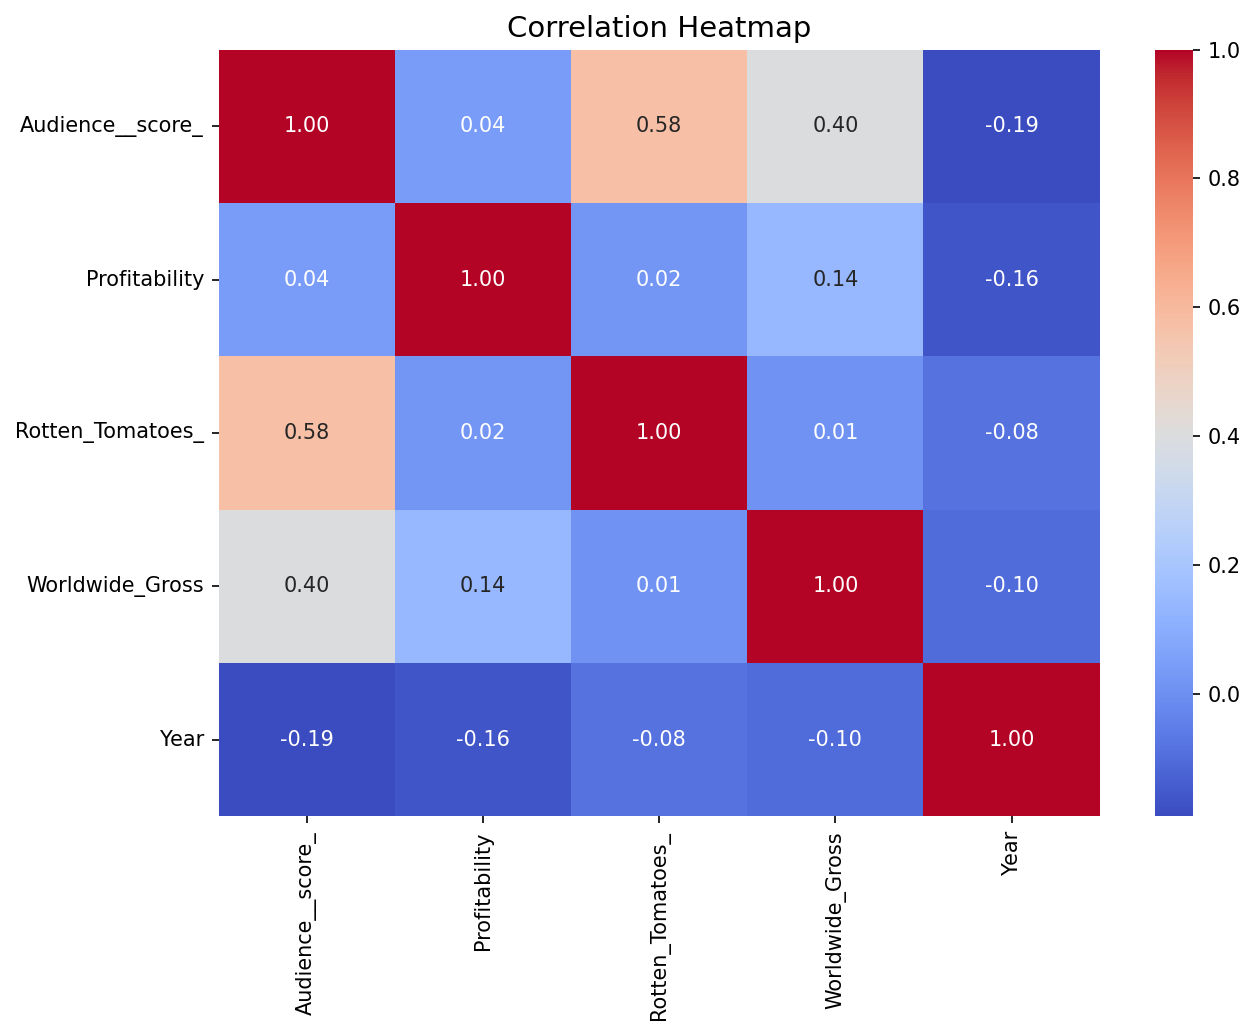

In [13]:
draw_corr_heatmap(numeric_columns)

In [14]:
def plot_genre_distribution_pie(df):
    """
    Creates a pie chart showing the distribution of genres.
    """
    genre_counts = df['Genre'].value_counts()  # Count occurrences of each genre

    plt.figure(figsize=(8,8))
    genre_counts.plot.pie(
        autopct='%1.1f%%',  # Display percentages
        startangle=90,      # Start the chart at the top
        colors=sns.color_palette('viridis', len(genre_counts)),  # Use a color palette
        textprops={'rotation':90}  # Rotate the percentage text by 90 degrees
    )
    plt.title("Distribution of Films by Genre", fontsize=14)
    plt.ylabel("")  # Remove the y-axis label
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

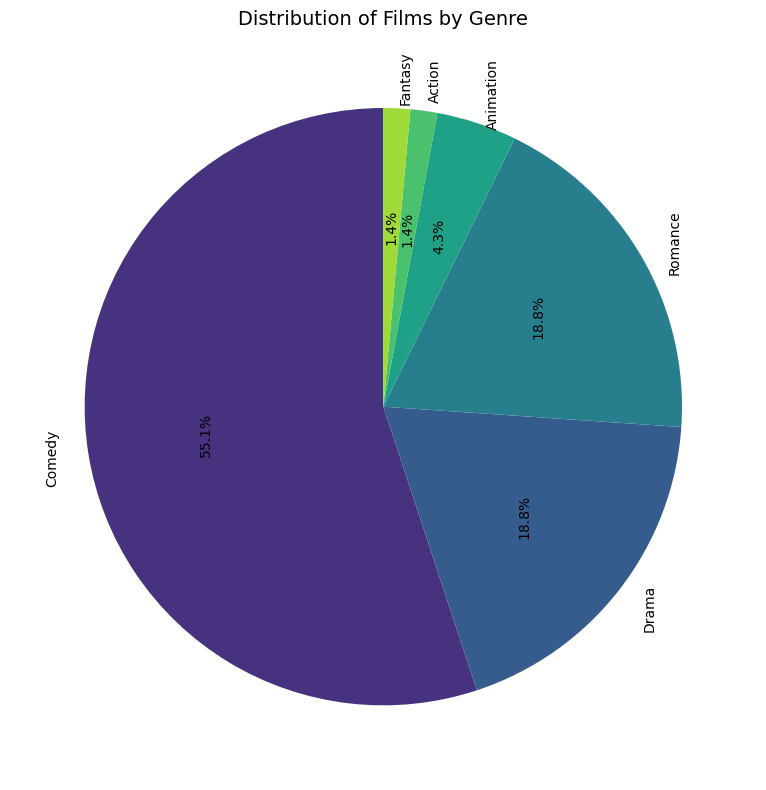

In [15]:
plot_genre_distribution_pie(data)

In [16]:
def plot_lead_studio_bar_chart(df):
    """
    Creates a bar chart showing the distribution of films by lead studio.
    """
    studio_counts = df['Lead_Studio'].value_counts()  # Count occurrences of each studio
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=studio_counts.index, y=studio_counts.values, hue=studio_counts,palette="viridis")
    plt.title("Number of Films by Lead Studio", fontsize=14)
    plt.xlabel("Lead Studio", fontsize=12)
    plt.ylabel("Number of Films", fontsize=12)
    plt.xticks(rotation=45, ha="right")  # Rotate for better readability
    plt.tight_layout()
    plt.show()

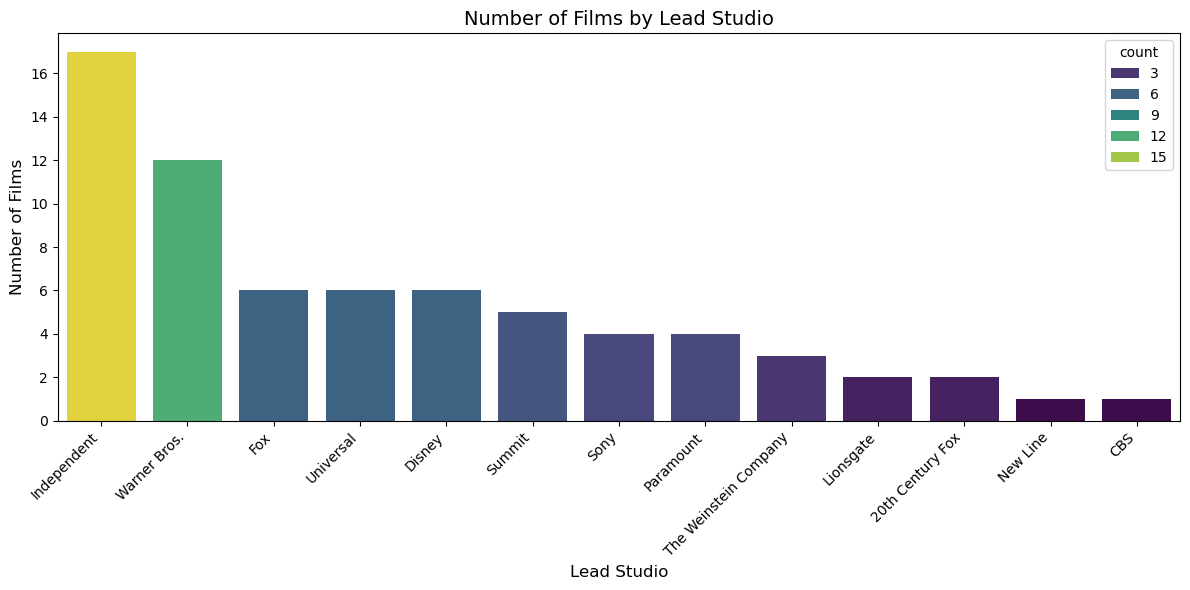

In [17]:
plot_lead_studio_bar_chart(data)

In [18]:
def simple_linear_fit_with_predictions(df, x_col, y_col, new_x=None):
    """
    Fits a linear regression model, plots the fit with confidence intervals, 
    and optionally makes predictions for new data.
    
    df : DataFrame : The dataset containing the data
    x_col : str : Column name for the independent variable
    y_col : str : Column name for the dependent variable
    new_x : array-like, optional : New data points to predict
    """
    # Extract data from the DataFrame
    x = df[x_col].values.reshape(-1, 1)  # Independent variable
    y = df[y_col].values  # Dependent variable
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(x, y)
    
    # Generate predictions for the existing data
    y_pred = model.predict(x)
    
    # Predict for new_x if provided
    new_y_pred = None
    if new_x is not None:
        new_x = np.array(new_x).reshape(-1, 1)
        new_y_pred = model.predict(new_x)
        print("Predictions of new data points:")
        for i, pred in enumerate(new_y_pred):
            print(f"  x = {new_x[i][0]:.2f}, Predicted y = {pred:.2f}")
    
    # Plot the data and regression line with confidence intervals
    plt.figure(figsize=(10, 6))
    sns.regplot(x=x.flatten(), y=y, ci=95, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
    plt.title(f'Linear Fit of {y_col} vs {x_col} with Confidence Intervals', fontsize=14)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.legend(['data points','line','confidence'], loc='upper left')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return model, new_y_pred

Predictions of new data points:
  x = 90.00, Predicted y = 75.99
  x = 91.00, Predicted y = 77.09
  x = 98.00, Predicted y = 84.79


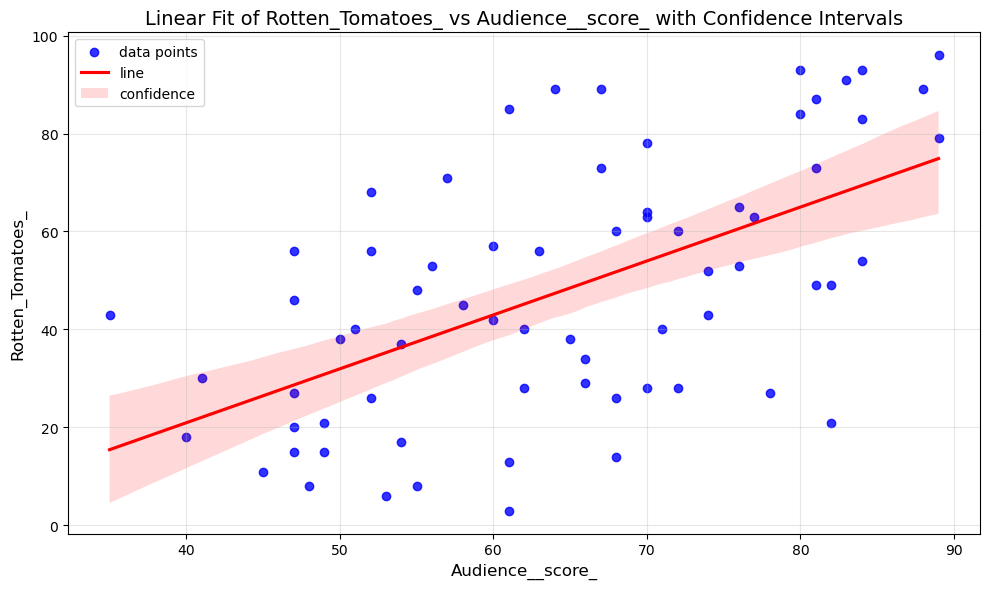

In [19]:
new_x = [90,91,98]
model = simple_linear_fit_with_predictions(data, 'Audience__score_','Rotten_Tomatoes_',new_x)

In [20]:
data_for_clustering = data[['Audience__score_', 'Rotten_Tomatoes_']].copy()  # Data for clustering with the specified columns

# Scale the data using RobustScaler to handle outliers
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data_for_clustering)


In [21]:
def compute_silhouette_and_inertia(cluster_count, data):
    """ 
    Calculates silhouette score and inertia for a given number of clusters.
    """
    kmeans_model = KMeans(n_clusters=cluster_count, n_init=20)
    kmeans_model.fit(data)  # Fit the model to the data
    labels = kmeans_model.labels_
    
    # Calculate silhouette score and inertia
    silhouette = silhouette_score(data, labels)
    inertia = kmeans_model.inertia_

    return silhouette, inertia


In [22]:
#Compute WCSS (Within-Cluster Sum of Squares) and silhouette scores
wcss_values = []
optimal_cluster_count, best_silhouette_score = None, -np.inf

# Loop through possible cluster counts and calculate silhouette score and inertia
for clusters in range(2, 11):  # Test from 2 to 10 clusters
    silhouette, inertia = compute_silhouette_and_inertia(clusters, scaled_data)
    wcss_values.append(inertia)
    
    # Update the best silhouette score and optimal cluster count
    if silhouette > best_silhouette_score:
        optimal_cluster_count = clusters
        best_silhouette_score = silhouette
        
    print(f"{clusters} clusters silhouette score = {silhouette:.2f}")

print(f"Optimal number of clusters = {optimal_cluster_count}")

2 clusters silhouette score = 0.46
3 clusters silhouette score = 0.36
4 clusters silhouette score = 0.41
5 clusters silhouette score = 0.41
6 clusters silhouette score = 0.45
7 clusters silhouette score = 0.42
8 clusters silhouette score = 0.40
9 clusters silhouette score = 0.39
10 clusters silhouette score = 0.38
Optimal number of clusters = 2


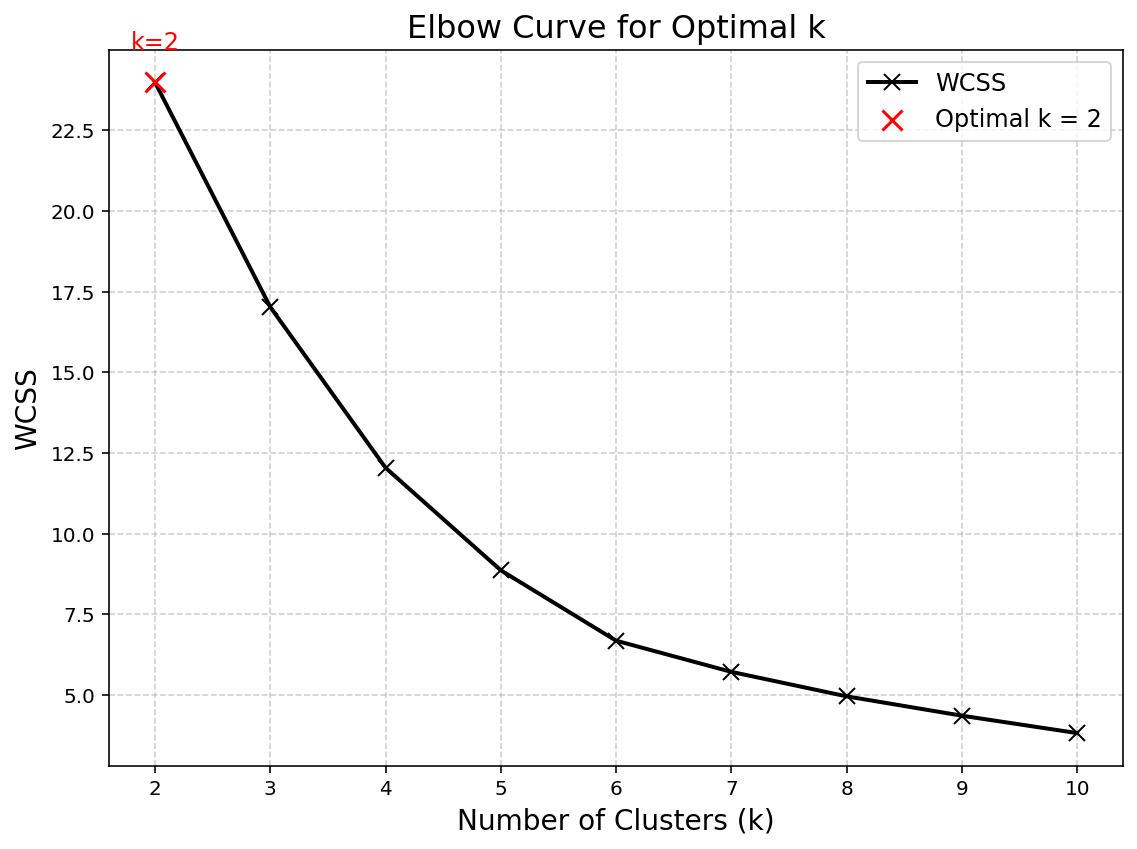

In [23]:
# Plot the Elbow Curve
def plot_elbow_curve(min_clusters, max_clusters, wcss_values, optimal_clusters):
    """
    Plots the elbow curve to determine the best number of clusters (k).
    Parameters:
    - min_clusters (int): The minimum number of clusters to consider.
    - max_clusters (int): The maximum number of clusters to consider.
    - wcss_values (list or array): List of Within-Cluster Sum of Squares for each k.
    - optimal_clusters (int): The optimal number of clusters as determined by silhouette score.
    """
    # Create a plot
    fig, ax = plt.subplots(figsize=(8, 6), dpi=144)
    
    # Plot WCSS values with black line
    cluster_range = range(min_clusters, max_clusters + 1)
    ax.plot(cluster_range, wcss_values, marker='x', color='black', label='WCSS', markersize=8, linewidth=2)  # 'k-' for black line
    
    # Mark the optimal number of clusters with crosses
    ax.scatter(optimal_clusters, wcss_values[optimal_clusters - min_clusters], color='red', edgecolor='black', s=100, zorder=5, marker='x', label=f'Optimal k = {optimal_clusters}')
    ax.annotate(
        f'k={optimal_clusters}',
        xy=(optimal_clusters, wcss_values[optimal_clusters - min_clusters]),
        xytext=(optimal_clusters, wcss_values[optimal_clusters - min_clusters] + (max(wcss_values) - min(wcss_values)) * 0.05),
        fontsize=12,
        color='red',
        ha='center'
    )
    
    # Customize plot
    ax.set_xlabel('Number of Clusters (k)', fontsize=14)
    ax.set_ylabel('WCSS', fontsize=14)
    ax.set_title('Elbow Curve for Optimal k', fontsize=16)
    ax.set_xticks(cluster_range)
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # Display legend
    ax.legend(fontsize=12)
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

# Plot the elbow curve
plot_elbow_curve(2, 10, wcss_values, optimal_cluster_count)

In [24]:
def plot_kmeans_results(labels, original_data, centers, x_centers, y_centers, center_labels, k):
    """
    Plots the clustering results for the current number of clusters.
    """
    plt.figure(figsize=(8, 6))
    
    # Plot the original data points, colored by their cluster labels
    sns.scatterplot(x=original_data[:, 0], y=original_data[:, 1], hue=labels, palette='deep', s=100, alpha=0.6)
    
    # Plot the cluster centers
    plt.scatter(x_centers, y_centers, color='black', marker='X', s=200, label="Cluster Centers")
    
    # Customize plot
    plt.title(f"K-Means Clustering with {k} Clusters", fontsize=16)
    plt.xlabel("Audience Score", fontsize=12)
    plt.ylabel("Rotten Tomatoes Score", fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

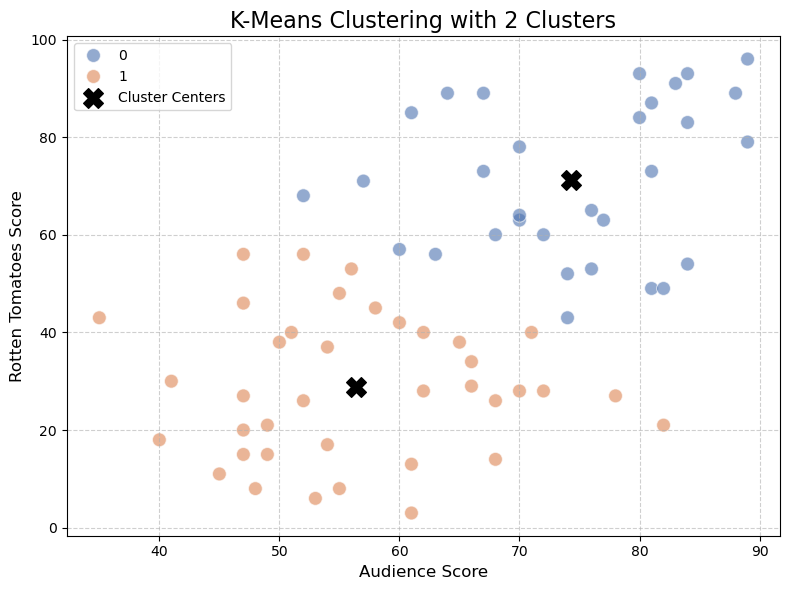

In [25]:
# Perform KMeans clustering for the optimal number of clusters
def perform_kmeans_clustering(original_data, normalized_data, scaler, cluster_range):
    """
    Performs K-Means clustering for a given range of k values and visualizes the results.
    Parameters: original_data (ndarray), normalized_data (ndarray), scaler (MinMaxScaler), cluster_range (iterable).
    """
    for k in cluster_range:
        # Initialize and fit K-Means with the current number of clusters
        kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
        kmeans.fit(normalized_data)
        
        # Retrieve cluster labels and cluster centers
        labels = kmeans.labels_
        centers = scaler.inverse_transform(kmeans.cluster_centers_)
        x_centers = centers[:, 0]
        y_centers = centers[:, 1]
        center_labels = kmeans.predict(kmeans.cluster_centers_)
        
        # Plot the results for the current k value
        plot_kmeans_results(labels, original_data, centers, x_centers, y_centers, center_labels, k)

# Inverse normalization for accurate plotting of the original data
inverse_norm = scaler.inverse_transform(scaled_data)

# Step 8: Perform KMeans clustering for k values in the range from 2 to 3
perform_kmeans_clustering(inverse_norm, scaled_data, scaler, cluster_range=range(2, 3))
